# MyND Offline Processing: Data Analysis
Author: Geeling Chau<br> 
Description: Process xdf files recorded from experimental sessions to determine file eligibility and data feature extraction.<br>
Sources: 
- Ollie's Segment Speller Offline Processing Code https://github.com/ollie-d/SegSpeller/blob/master/Offline%20Processing.ipynb 
- neurodsp https://github.com/neurodsp-tools/neurodsp
- FOOOF https://fooof-tools.github.io/fooof/index.html 


## Imports

In [1]:
from helperFunctions import *
from constants import *
from dataAnalysisFunctions import *

from neurodsp.plts.spectral import *

import warnings
warnings.filterwarnings('ignore')

## Data imports

In [2]:
filename_foldername_dict_path = "../data/most_currently_updated.pickle"
filename_foldername_dict = loadPickle(filename_foldername_dict_path)

foldername=filename_foldername_dict["foldername"]
filename=filename_foldername_dict["filename"]
print(foldername, filename)

dataframe_directory = "../data/dataframe/"+foldername+"/"
dataframe_path = dataframe_directory+filename+".pickle"

df = loadPickle(dataframe_path)

P006 part_P006_exp001_block_long


In [3]:
incorporate_matlab_data = False
if incorporate_matlab_data: 
    filtered_matlab_data_directory = "../data/filtered_matlab_data/"+foldername+"/"
    filtered_matlab_data_path = filtered_matlab_data_directory+filename+".pickle"
    filtered_matlab_data = loadPickle(filtered_matlab_data_path)
    all_data = filtered_matlab_data
    data_type="data_matlab_extended"
else :
    filtered_cleaned_data_directory = "../data/filtered_cleaned_data/"+foldername+"/"
    filtered_cleaned_data_path = filtered_cleaned_data_directory+filename+".pickle"
    filtered_cleaned_data = loadPickle(filtered_cleaned_data_path)
    all_data = filtered_cleaned_data
    data_type="data_extended"

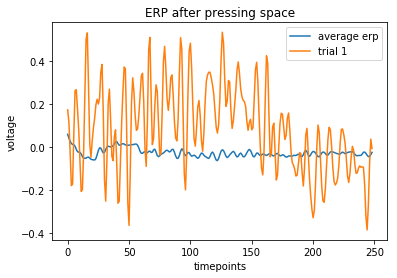

In [10]:
# ERP after space press
space_press_data, _, _ = getTimeBoundSingleLabelData("spacePressed", all_data, 0, 1)
eeg_list = tidyEEGList(getEEGFromDataList_AvgLeftRight(space_press_data))
plt.plot(np.mean(eeg_list, axis=0), label="average erp")
plt.plot(eeg_list[0], label="trial 1")


plt.title("ERP after pressing space")
plt.xlabel("timepoints")
plt.ylabel("voltage")
plt.legend()
plt.show()



In [5]:

data_type="data_matlab" if incorporate_matlab_data else "data"

num in list: 1 29
num in list: 2 71
num in list: 3 107
num in list: 4 111
num in list: 5 65


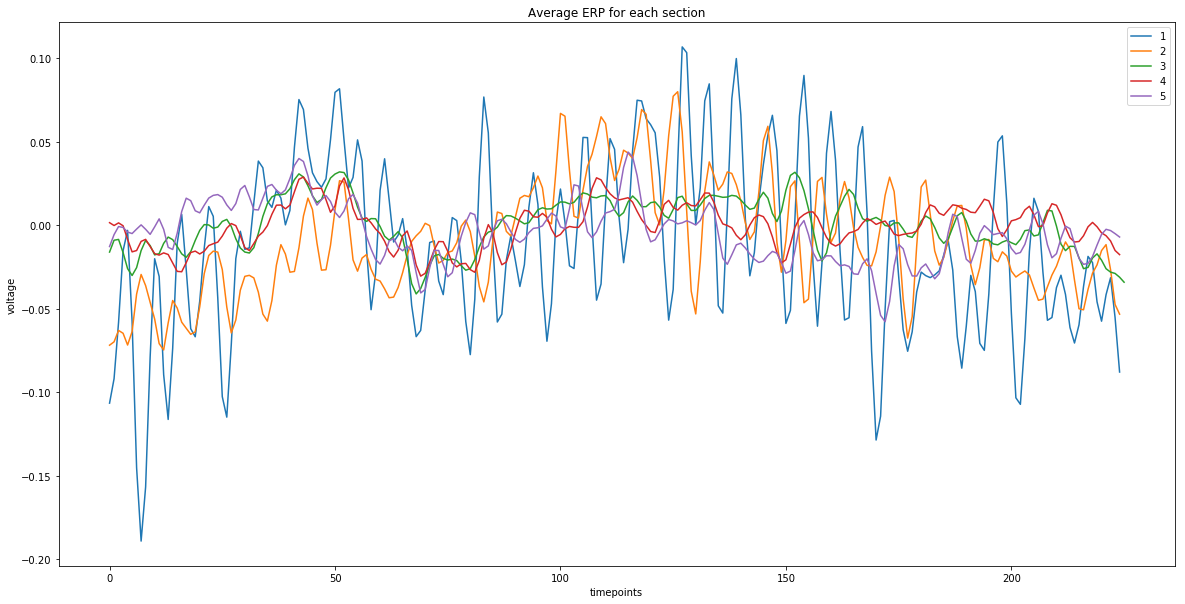

In [6]:
# Display average ERPs for each section
plt.figure(figsize=(20,10))


for i in range(1, 6): 
    feature_name = "section_number"
    eeg_list = tidyEEGList(getEEGFromDataFrame_AvgLeftRight(df[df[feature_name]==i], data_type=data_type))
    print("num in list: " + str(i), len(eeg_list))
    plt.plot(np.mean(eeg_list, axis=0), label=i)

plt.title("Average ERP for each section")
plt.xlabel("timepoints")
plt.ylabel("voltage")
plt.legend()
plt.show()

In [12]:
df

,data_index,data,data_extended,is_target,is_pressed,has_letters_shown,has_meme,time,points,reaction_time,section_number,looking_up,looking_right,trial_time,word_length
0,0,"{'eye': {'time': [2232.4848866803745, 2232.509...","{'eye': {'time': [2232.039100674954, 2232.0725...",False,False,False,False,2232.475428,0,0.000000,1,22,0,1.2,1
1,1,"{'eye': {'time': [2233.688267085111, 2233.7060...","{'eye': {'time': [2233.200666267838, 2233.2217...",False,False,False,False,2233.686501,0,0.000000,1,9,0,1.2,1
2,2,"{'eye': {'time': [2234.922285566738, 2234.9444...","{'eye': {'time': [2234.420808037515, 2234.4451...",False,False,False,False,2234.903139,0,0.000000,1,0,0,1.2,1
3,3,"{'eye': {'time': [2236.192190123238, 2236.2113...","{'eye': {'time': [2235.632668721221, 2235.6599...",False,False,False,False,2236.121551,0,0.000000,1,0,0,1.2,1
4,4,"{'eye': {'time': [2237.3340640701917, 2237.366...","{'eye': {'time': [2236.8520106139003, 2236.873...",False,False,False,False,2237.331790,0,0.000000,1,0,0,1.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,381,"{'eye': {'time': [2671.8383783895715, 2671.867...","{'eye': {'time': [2671.2913961605095, 2671.310...",False,False,False,False,2671.752893,0,0.000000,5,4,8,1.0,1
379,382,"{'eye': {'time': [2672.8426895880125, 2672.860...","{'eye': {'time': [2672.2755165540225, 2672.301...",False,False,False,False,2672.770715,0,0.000000,5,6,28,1.0,1
380,383,"{'eye': {'time': [2673.786374532669, 2673.8184...","{'eye': {'time': [2673.3554766371954, 2673.384...",True,True,False,False,2673.786246,1,0.647420,5,5,52,1.0,1
381,384,"{'eye': {'time': [2674.850896022897, 2674.8764...","{'eye': {'time': [2674.3433236466954, 2674.360...",True,True,False,False,2674.803369,1,0.530145,5,6,42,1.0,1


num in first list: 105
num in second list: 278


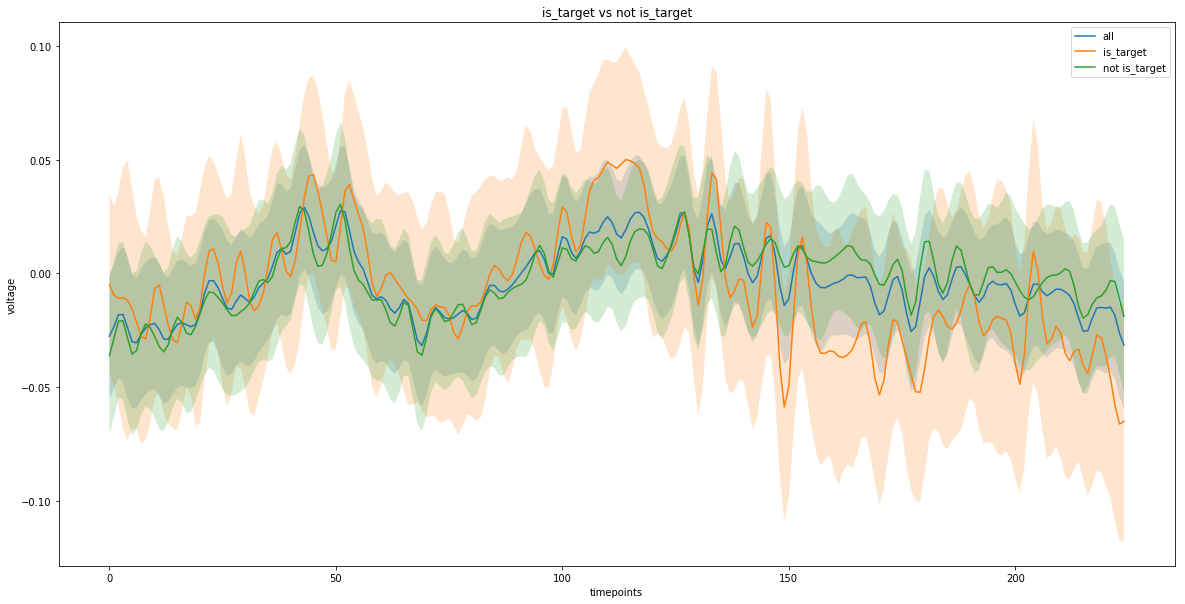

In [11]:
# Compare ERPs
plt.figure(figsize=(20,10))

eeg_list = tidyEEGList(getEEGFromDataFrame_AvgLeftRight(df, data_type=data_type))
av=np.mean(eeg_list, axis=0)
sem=getSEM(eeg_list)
plt.plot(av, label="all")
plt.fill_between(list(range(len(av))), av-sem, av+sem, alpha = 0.2)


feature_name = 'is_target'
eeg_list_1 = tidyEEGList(getEEGFromDataFrame_AvgLeftRight(df[df[feature_name]==True], data_type=data_type))
print("num in first list:", len(eeg_list_1))
av1=np.mean(eeg_list_1, axis=0)
sem1=getSEM(eeg_list_1)
plt.plot(av1, label=feature_name)
plt.fill_between(list(range(len(av1))), av1-sem1, av1+sem1, alpha = 0.2)

eeg_list_not_1 = tidyEEGList(getEEGFromDataFrame_AvgLeftRight(df[df[feature_name]==False], data_type=data_type))
av2=np.mean(eeg_list_not_1, axis=0)
sem2=getSEM(eeg_list_not_1)
print("num in second list:", len(eeg_list_not_1))
plt.plot(av2, label="not " + feature_name)
plt.fill_between(list(range(len(av2))), av2-sem2, av2+sem2, alpha = 0.2)


plt.title(feature_name + " vs not " + feature_name)
plt.xlabel("timepoints")
plt.ylabel("voltage")
plt.legend()
plt.show()